# Instructions for Dad:Go to Top Menu and Click 'Kernel', go down the list to option 4: "Restart & Run All". Then scroll down to the "Inference" section to see results within a few seconds.

In [1]:
import torch
from torch import nn
from torch.autograd import Variable
from torch import optim
import torch.nn.functional as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [3]:
import ssl
import pandas as pd
ssl._create_default_https_context = ssl._create_unverified_context


# ONLINE SGD prediction

# multistock buying

define functions


In [5]:
# import random

def linearloss(purchases,deltas):
    loss=0
    
    #print(deltas)
    for i,z in enumerate(deltas):
        loss+=-z*purchases[i]
    return loss
def delta_seq(prices):
    prices=np.array(prices)
    deltas=[]
    last_price=prices[0]
    for i, price in enumerate(prices[1:]):
        deltas.append(list(price-last_price))
        last_price=price
    return deltas

def manage_bank_account(purchases,prices):
    purchases=np.array(purchases)
    how_many_shares_i_own=purchases[0]
    profit_tracker=[]
    gain_tracker=[]
    bank_account= -sum(prices[0])
    stock_account=how_many_shares_i_own*prices[1]
    
    
    for i in range(1,len(purchases)-1):
        
        how_many_shares_i_own+=purchases[i]
        
        bank_account-=sum(purchases[i]*prices[i])
        stock_account=how_many_shares_i_own*prices[i+1]
        gain_tracker.append(sum(how_many_shares_i_own*((np.array(prices[i])-np.array(prices[i-1])))))
        profit_tracker.append(sum(stock_account)/-bank_account)
        if i==len(purchases)-3:
            last_bank=bank_account
    last_gain=how_many_shares_i_own*((np.array(prices[-1])-np.array(prices[-2])))
            
    
    return bank_account,stock_account,last_gain,profit_tracker,gain_tracker
        
        



In [6]:
import numpy as np


# LOAD DATA(start_date = '2017-9-24',end_date = 'TODAY')


In [17]:
from pandas_datareader import data
tickers = ['AAPL','AMZN','COST','FB','GOOGL','INTC','MSFT','NFLX','XLNX']
#tickers = ['AMZN','COST','MSFT','NFLX','NVDA','XLNX']

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2017-9-24'
end_date = '2020-12-30'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader(tickers, 'yahoo', start_date, end_date)
prices=panel_data['Close'].values

In [18]:
print(panel_data['Close'])

Symbols           AAPL         AMZN        COST          FB        GOOGL  \
Date                                                                       
2017-09-25  150.550003   939.789978  162.330002  162.869995   934.280029   
2017-09-26  153.139999   938.599976  164.070007  164.210007   937.429993   
2017-09-27  154.229996   950.869995  164.419998  167.679993   959.900024   
2017-09-28  153.279999   956.400024  163.899994  168.729996   964.809998   
2017-09-29  154.119995   961.349976  164.289993  170.869995   973.719971   
2017-10-02  153.809998   959.190002  165.889999  169.470001   967.469971   
2017-10-03  154.479996   957.099976  165.080002  169.960007   972.080017   
2017-10-04  153.479996   965.450012  165.210007  168.419998   966.780029   
2017-10-05  155.389999   980.849976  167.070007  171.240005   985.190002   
2017-10-06  155.300003   989.580017  157.089996  172.229996   993.640015   
2017-10-09  155.839996   990.989990  154.610001  172.500000   992.309998   
2017-10-10  

In [9]:
 def bound_candidate(bound,candidate):
            for i in range(len(candidate)):
                if candidate[i]>bound:
                    candidate[i]=bound
                if candidate[i]<-bound:
                    candidate[i]=-bound
            return candidate
def rounded_MWU(deltas,w0,etta,prices,buy_cap):
    purchases=[w0]
    rounded_purchases=[w0]
    
    for i,z in enumerate(deltas):
        candidate=purchases[i]+etta*z
        candidate=bound_candidate(buy_cap,candidate)
       
        #rounded_candidate=[round(i/min([abs(j) for j in candidate])) for i in candidate]
        def floorey(num):
            if num>0:
                return math.floor(num)
            else:
                return math.ceil(num)
        rounded_candidate=[float(floorey(i)) for i in candidate]
        rounded_candidate=bound_candidate(buy_cap,rounded_candidate)
        purchases.append(list(candidate))
        rounded_purchases.append(list(rounded_candidate))
    return rounded_purchases

In [10]:
import math
import numpy as np

In [11]:
deltas=np.array(delta_seq(prices))

In [12]:
w0=[1.0]*9

# HYPERPARAM SEARCH


In [13]:
best_percent_gained=0.0
best_mean=None
#kinda like training to get best learning rate
#means=[i/200 for i in range(200)]
for i in range(2000):
    #ettas=[means[i]+np.random.normal()*.01 for i in range(100)]

    calcdpurchases=rounded_MWU(deltas[:int(.5*len(deltas))],w0,i/2000,prices,3.0)
    calcbank,calcportfolio,last_gain,profit_tracker,gain_tracker=manage_bank_account(calcdpurchases,prices)
    percent=sum(calcportfolio)/-calcbank
    if percent>best_percent_gained:
        best_percent_gained=percent
        best_mean=i/2000
        print(i,best_percent_gained)
print("best mean"+str(best_mean))    

0 1.0994349890553459
11 1.1018804644752276
31 1.1022901673148904
32 1.103108889528366
34 1.1031306688889473
35 1.1040912353945822
36 1.104254190593206
37 1.1044788618751995
38 1.1050676369845662
39 1.1057821329766486
40 1.1062470221336602
41 1.1070523222346496
42 1.1076299559403182
43 1.1094835943744323
44 1.1104554589603095
45 1.110673622956465
46 1.1112013766630622
47 1.11237616723699
48 1.1138046142142086
49 1.1150850192434811
50 1.1158596067969466
51 1.1160427789452556
52 1.1173449536053885
53 1.1175650983481094
54 1.1177918890515204
55 1.1178582434896263
56 1.1192742911487343
57 1.1194521015334677
58 1.1203106910935063
59 1.1207186459806906
60 1.1209032359556754
61 1.1214023727928877
62 1.1214185431403911
63 1.121456871753073
64 1.1225229754842456
best mean0.032


# Inference

In [14]:
#validate it on second half
print(tickers)
# print("u picked "+str(calcdpurchases[-2])+"in the morning")
# print("morning price"+str(prices[-2]))
deltas=np.array(delta_seq(prices))
w0=[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]
#w0=[1.0,1.0,1.0,1.0,1.0,1.0]
calcdpurchases=rounded_MWU(deltas[int(.5*len(deltas)):],w0,.32,prices[int(.5*len(deltas)):],3.0)
calcbank,calcportfolio,last_gain,profit_tracker,gain_tracker=manage_bank_account(calcdpurchases,prices)
def calc_profit(purchase,delta):
    profit=0
    for i in range(len(purchase)):
        if purchase[i]>0:
            profit+=purchase[i]*delta[i]
    return profit
        
profit_last_day=calc_profit(calcdpurchases[-2],deltas[-1])

print("if u chose stocks this morning   "+str(calcdpurchases[-2])+"and overall gain"+str(sum(last_gain)))
print("amount in bank: "+str(calcbank)+"\n amount of money ur holdings are worth "+str(calcportfolio)+" \n how many shares you have of each company "+str(np.array(calcportfolio)/prices[-1])+" \n the net worth of your holdings: "+str(sum(calcportfolio))+ " \n the percent gained: "+str(sum(calcportfolio)/-calcbank))

print("best picks for tmrw :"+str(calcdpurchases[-1]))

['AAPL', 'AMZN', 'COST', 'FB', 'GOOGL', 'INTC', 'MSFT', 'NFLX', 'XLNX']
if u chose stocks this morning   [0.0, 1.0, 0.0, 0.0, 3.0, 0.0, 1.0, 3.0, 3.0]and overall gain2078.6305770874023
amount in bank: -209648.5092048645
 amount of money ur holdings are worth [ 22321.20080566 128163.06079102  32430.75050354  -1564.74000549
  29141.           3146.47010803  20615.          17231.49932861
  15551.72970581] 
 how many shares you have of each company [124.99272358  75.82850095 140.22289292 -11.128227    26.26143321
  63.80997811 185.90495188  60.2226227  168.16316113] 
 the net worth of your holdings: 267035.9712371826 
 the percent gained: 1.2737317916066848
best picks for tmrw :[0.0, 3.0, 1.0, 0.0, 3.0, 0.0, 1.0, 2.0, 3.0]


# METRICS


In [15]:
basic_profit=profit_tracker
basic_gain=gain_tracker

151 300


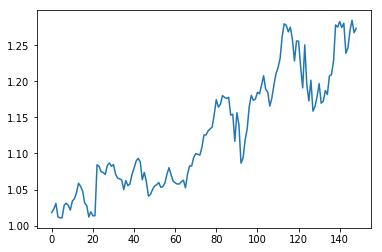

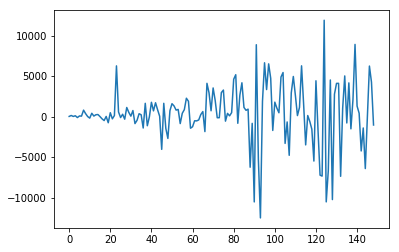

In [16]:

%matplotlib inline
print(len(calcdpurchases),len(prices))
plt.plot(basic_profit)
plt.show()
plt.plot(basic_gain)
plt.show()


now we test our highest percent profit algorithm, multi_agent_mwu on synthetic data on a portfolio consisting of ['aapl','abc'] where the long term trends are approximately the same but the hour the hour data is completely synthesizd by https://github.com/mrocklin/fakestockdata



Now we perform an ablation study and see the results of using just buying eery other day and buying with memory lengths 0,...,100.